In [1]:
import pandas as pd
import tensorflow as tf
physcial_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physcial_devices[0],True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential


In [2]:
# from google.colab import files 
# uploaded = files.upload()

In [3]:
train = pd.read_csv('sign_mnist_train.csv.zip')
test = pd.read_csv('sign_mnist_test.csv.zip')

In [4]:
class_names = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

Text(0.5, 1.0, 'Label')

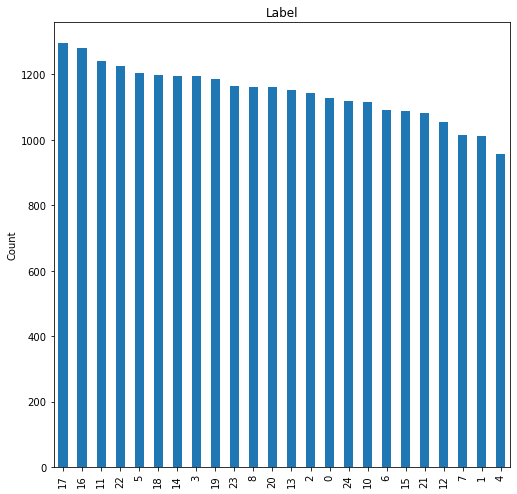

In [5]:
#checking balanced dataset

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train.label.value_counts().plot(kind='bar',ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [6]:
train_data =np.array(train,dtype='float32')
test_data =np.array(test,dtype='float32')

X_train = train_data[:,1:]/255
X_test = test_data[:,1:]/255

y_train = np.array(pd.get_dummies(train.label))
y_test = np.array(pd.get_dummies(test.label))




In [7]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))


In [8]:
model = Sequential([
                    Conv2D(32,3, input_shape=(28,28,1),activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Conv2D(64,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Conv2D(128,3,activation='relu'),
                    MaxPooling2D(pool_size=(2,2)),
                    Dropout(0.5),
                    Flatten(),
                    Dense(128,activation='relu'),
                    Dense(24,activation='softmax')




])

In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         7

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
history = model.fit(X_train,y_train,batch_size=64,epochs=100,validation_split=0.1,callbacks=[EarlyStopping()])

Epoch 1/100
387/387 [==============================] - 5s 8ms/step - loss: 3.1216 - accuracy: 0.0629 - val_loss: 1.9742 - val_accuracy: 0.4093
Epoch 2/100
387/387 [==============================] - 3s 7ms/step - loss: 1.8591 - accuracy: 0.3918 - val_loss: 0.8839 - val_accuracy: 0.7469
Epoch 3/100
387/387 [==============================] - 3s 7ms/step - loss: 1.1109 - accuracy: 0.6170 - val_loss: 0.5088 - val_accuracy: 0.8602
Epoch 4/100
387/387 [==============================] - 3s 6ms/step - loss: 0.8416 - accuracy: 0.7026 - val_loss: 0.3157 - val_accuracy: 0.9210
Epoch 5/100
387/387 [==============================] - 3s 7ms/step - loss: 0.6920 - accuracy: 0.7576 - val_loss: 0.2406 - val_accuracy: 0.9395
Epoch 6/100
387/387 [==============================] - 3s 7ms/step - loss: 0.6047 - accuracy: 0.7872 - val_loss: 0.1982 - val_accuracy: 0.9581
Epoch 7/100
387/387 [==============================] - 3s 7ms/step - loss: 0.5178 - accuracy: 0.8144 - val_loss: 0.1464 - val_accuracy: 0.9650

In [11]:
_,acc =model.evaluate(X_test,y_test)
print(f'Model accuracy: {acc}')

225/225 [==============================] - 1s 4ms/step - loss: 0.1865 - accuracy: 0.9453
Model accuracy: 0.945343017578125


In [12]:
y_pred = model.predict(X_test)
y_pred.shape

(7172, 24)

In [13]:
y_pred2 = np.argmax(y_pred, axis=1)
y_pred2.shape

(7172,)

In [14]:
y_test2 = np.argmax(y_test,axis=1)

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test2,y_pred2))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       331
           1       1.00      0.95      0.97       432
           2       0.90      1.00      0.95       310
           3       1.00      0.97      0.98       245
           4       0.96      1.00      0.98       498
           5       1.00      1.00      1.00       247
           6       0.90      0.83      0.86       348
           7       0.88      0.95      0.92       436
           8       0.93      1.00      0.96       288
           9       1.00      0.96      0.98       331
          10       1.00      1.00      1.00       209
          11       0.94      0.90      0.92       394
          12       0.99      0.86      0.92       291
          13       1.00      0.84      0.91       246
          14       1.00      0.99      0.99       347
          15       1.00      1.00      1.00       164
          16       0.84      0.99      0.91       144
          17       0.94    